In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import os

In [3]:
# get the path in order to get the needed files
path = os.getcwd()

## First, I create a dataframe about all the countries

In [4]:
# read the geopandas dataset which contains the geometry(polygons that represent the shape of countries) for every country.
shape = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


# read the csv file which contains all the reported shark attacks that occured globaly
df = pd.read_csv(path+'\\files_for_plots\\attacks2.csv')

In [5]:
# df is a new dataframe with countries and the number of shark attacks for each country
df = pd.DataFrame(df['Country'].value_counts())

# I made some changes to the df form in order to merge it with shape dataset
df.reset_index(inplace=True)
df.rename(columns={'index':'name','Country':'Counts'},inplace=True)
df = df.replace('Usa','United States of America') 

In [6]:
# merging the two dataframes
shape=shape.merge(df,'left')

In [7]:
# create a new column with % values for each country
shape['% Counts'] = (shape['Counts']*100)/shape['pop_est'] 

## Then, I create a dataframe for the states of USA

In [8]:
# As previous, these are the two dataframes with the geometry and the sark attacks, respectively.

states = gpd.read_file(path+'\\files_for_plots\\cb_2018_us_state_500k\\cb_2018_us_state_500k.shp')
df2 = pd.read_csv(path+'\\files_for_plots\\attacks2.csv')

In [9]:
# In this case, I keep only the rows with shark attacks that took place in USA.
df2 = df2[df2['Country']=='Usa']

df2 = pd.DataFrame(df2['Area'].value_counts())
df2.reset_index(inplace=True)
df2.rename(columns={'index':'name','Area':'Counts'},inplace=True)
df2.rename(columns={'name':'NAME'},inplace=True)
df2.replace({'CUBA':'Cuba'},inplace=True)
#states=states.merge(df2,'left')

## I find the percentage of attacks according to the population of each country/state.

In [10]:
# I had to use an extra dataframe which contains the population of each state because the shp file doesn't include this inforamtion
us_pop = pd.read_csv(path+'\\files_for_plots\\us_states_pop.csv')

In [11]:
# I changed the column name to merge us_pop with df2
us_pop.rename(columns={'POPESTIMATE2019':'population'},inplace=True)

In [12]:
# drop columnσ that are not needed
us_pop.drop(['lat','long'],axis=1,inplace=True)

In [13]:
# rename the column to merge with states
us_pop.rename(columns={'STATE':'NAME'},inplace=True)

In [14]:
# merge df2 with us_pop
df2=df2.merge(us_pop,'left')

In [15]:
# merge states with df2
states=states.merge(df2,'left')

In [16]:
# create a new column with % values for each state
states['% Counts'] = (states['Counts']*100/states['population']) #

In [17]:
# drop column that are not needed
shape=shape.drop(['continent','iso_a3','gdp_md_est'],axis=1)

In [18]:
states=states.drop(['STATEFP','STATENS','AFFGEOID','STUSPS','LSAD','ALAND','AWATER'],axis=1)

In [19]:
states=states.drop('GEOID',axis=1)

In [20]:
# rename columns to have cleaner data
states.rename(columns={'NAME':'name','Area':'Counts','pop_est':'population'},inplace=True)

In [21]:
# change the columns order to organiuze them better
states = states[['population','name','geometry','Counts','% Counts']]

In [22]:
# editing the dataframe in order to merge it with 
states.rename(index={i:i+177 for i in range(len(states))}, inplace=True)

In [23]:
states.to_crs(crs='NAD83',inplace=True)

In [24]:
shape.to_crs(crs='NAD83',inplace=True)

In [25]:
# merge shape and states so I can use them as one dataframe for the plot
whole = pd.concat((shape,states))

## Finally, I use the information of the two dataframes to create the following map.

Text(0.5, 1.0, 'Shark attacks in the world (% of each country/state population)')

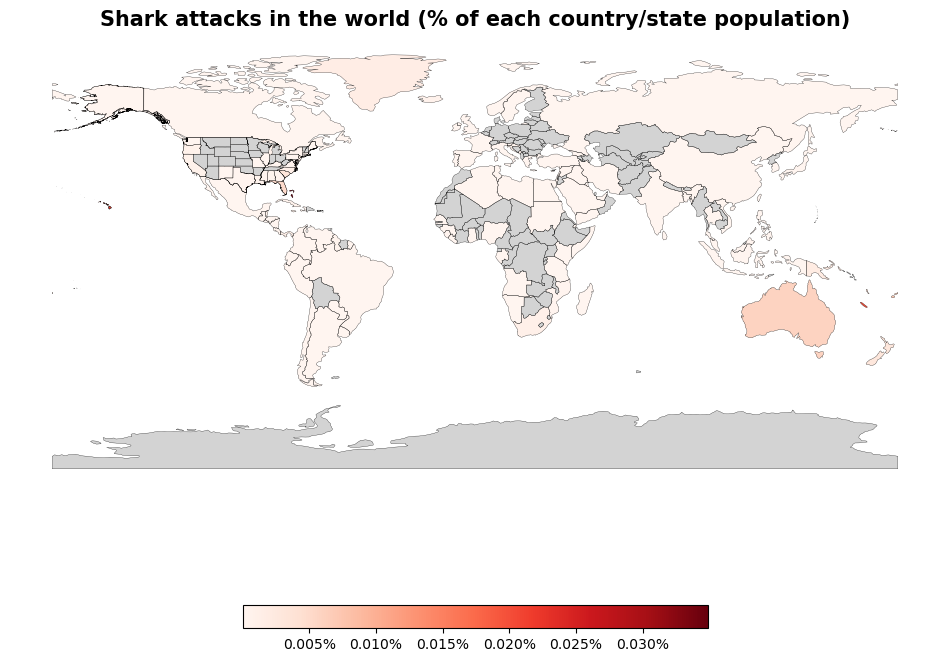

In [26]:
# the kind of the plot (boundary : shows country/state borders)
ax = whole.boundary.plot(edgecolor='black', linewidth=0.2, figsize=(12,10))

# the data that are used in the plot
whole.plot(ax=ax, 
           column='% Counts', 
           legend=True, 
           cmap='Reds', 
           legend_kwds={'shrink':0.5,'orientation':'horizontal','format':'%.3f%%'}, 
           missing_kwds={'color':'lightgrey'})

# to hide the lines and axis around the plot
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

for edge in ['right','left','top','bottom']:
    ax.spines[edge].set_visible(False)
    
# setting title
ax.set_title('Shark attacks in the world (% of each country/state population)', size=15, weight='bold')

#plt.savefig('attacks%%.png')